In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # "jax" or "tensorflow" or "torch"
# os.environ["WANDB_SILENT"] = "false" # for wandb

import torch
#import jax
import tensorflow as tf
# from tensorflow import keras
# import tensorflow.keras.backend as K

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.cm.get_cmap('coolwarm')

<ipython-input-2-eb155fc0ce64>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [ ]:
print("TensorFlow:", tf.__version__)
# print("JAX:", jax.__version__)
print("Keras:", keras.__version__)
print("KerasNLP:", keras_nlp.__version__)

TensorFlow: 2.16.1
Keras: 0.1.7
KerasNLP: 0.6.3


In [ ]:
!pip show jax jaxlib

Name: jax
Version: 0.4.25
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ml-dtypes, numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax-checkpoint
---
Name: jaxlib
Version: 0.4.24
Summary: XLA library for JAX
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ml-dtypes, numpy, scipy
Required-by: chex, dopamine-rl, optax, orbax-checkpoint


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
cd drive

/content/drive


In [5]:
cd MyDrive

/content/drive/MyDrive


In [6]:

ls

'003 (1).jpg'                      coco/                eICU/                           wandb/
'A.Zarindast Employment App.pdf'  'Colab Notebooks'/    llm-detect-ai-generated-text/   wellsfargo/
 caption_datasets.zip             'Collab Notebooks'/   model.png


In [7]:
BASE_PATH = 'llm-detect-ai-generated-text'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.cm.get_cmap('coolwarm')


df = pd.read_csv(f'{BASE_PATH}/train_essays.csv')  # Read CSV file into a DataFrame
df['label'] = df.generated.copy()




<ipython-input-8-25dad588187c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [11]:
# Load external data
ext_df1 = pd.read_csv(f'{BASE_PATH}/train_drcat_04.csv')
ext_df2 = pd.read_csv(f'{BASE_PATH}/argugpt.csv')[['id','text','model']]

ext_df2.rename(columns={'model':'source'}, inplace=True)
ext_df2['label'] = 1

ext_df = pd.concat([
    ext_df1[ext_df1.source=='persuade_corpus'].sample(10000),
    ext_df1[ext_df1.source!='persuade_corpus'],
#     ext_df2,
])




In [12]:

df = ext_df.copy().reset_index(drop=True) # pd.concat([ext_df, df], axis=0)
df.head()

,essay_id,text,label,source,prompt,fold
0,BBC740F1DC57,"The author of ""The Challenge of Exploring Venu...",0,persuade_corpus,NaN,6
1,A888A6709E94,The day without driving\n\nOur world has becam...,0,persuade_corpus,NaN,8
2,EFEFA4F6596E,"Dear Principle,\n\nIf I were you I would let a...",0,persuade_corpus,NaN,2
3,786CC75D9EEE,In life people sometimes talk to multiple peop...,0,persuade_corpus,NaN,1
4,5816447F692C,Many students across the country can relate to...,0,persuade_corpus,NaN,5


# Incoporate learning rate function and load from prior batch

In [ ]:
ext_df

,essay_id,text,label,source,prompt,fold,name
30632,D1861C521BF7,Do you remember the first day you got your lic...,0,persuade_corpus,NaN,1,real
32568,16A92F43071D,Have you heard that some schools might require...,0,persuade_corpus,NaN,1,real
3785,CFDCEE813DF6,Have you ever been forced to participate in so...,0,persuade_corpus,NaN,6,real
36910,6BEDE1C49244,Dear TEACHER_NAME\n\nDear TEACHER_NAME this is...,0,persuade_corpus,NaN,1,real
39416,39B821028D1A,"When summer break comes by, do teachers first ...",0,persuade_corpus,NaN,0,real
...,...,...,...,...,...,...,...
44190,falcon_180b_v1_261,I think it's a good idea for schools to have o...,1,falcon_180b_v1,Some schools have implemented policies that al...,0,fake
44195,BDF13939FA26,Students often debate whether inactivity or s...,1,mistral7binstruct_v2,\nTask: Research the benefits of staying occup...,3,fake
44197,1ed36fd42635_04112023,The Seagoing Cowboys program is an amazing opp...,1,darragh_claude_v6,NaN,5,fake
44199,d8f15f7d,Advantages of Limiting Car Usage\n\nLimiting c...,1,radek_500,NaN,0,fake


In [14]:

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import StratifiedKFold
from transformers import DebertaV2Model, DebertaV2Tokenizer
from transformers import AdamW
import math
import os

text_data=[]
for i in ext_df.text:
  text_data.append(i)

label_data=[]
for i in ext_df.label:
  label_data.append(i)

# Define the text data and corresponding labels
texts = text_data
labels = label_data  # Example labels: 1 for positive sentiment, 0 for negative sentiment

# Load the DeBERTa model and tokenizer
MODEL_NAME = 'microsoft/deberta-v3-base'
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

# Unfreeze model parameters for fine-tuning
for param in deberta_model.parameters():
    param.requires_grad = True

# Define custom classifier head with activation function for text classification
class TextClassifierHead(nn.Module):
    def __init__(self, input_size, num_labels, activation):
        super(TextClassifierHead, self).__init__()
        self.dropout = nn.Dropout(0.1)  # Example dropout rate
        self.fc = nn.Linear(input_size, num_labels)
        self.activation = activation

    def forward(self, x):
        x = self.dropout(x)
        x = self.fc(x)
        if self.activation is not None:
            x = self.activation(x)
        return x

# Define DeBERTaV3CustomClassifier with the new classifier head
class DebertaV3CustomClassifier(nn.Module):
    def __init__(self, deberta_model, num_labels, activation):
        super(DebertaV3CustomClassifier, self).__init__()
        self.deberta = deberta_model
        self.classifier = TextClassifierHead(deberta_model.config.hidden_size, num_labels, activation)

    def forward(self, input_ids, attention_mask):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Take the CLS token
        logits = self.classifier(pooled_output)
        return logits

# Define activation function
activation_function = nn.ReLU()  # Example: ReLU activation

# Create the model with the custom classifier head and activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)

# Define cross-validation parameters
num_epochs = 2
batch_size = 8 # Example batch size
num_workers = 4  # Limit resource consumption by setting the number of worker threads

# Define your predefined learning rate function
def get_lr(epoch):
    lr_start, lr_max, lr_min = 0.6e-6, 0.5e-6 * batch_size, 0.3e-6
    lr_ramp_ep, lr_sus_ep, lr_decay = 1, 0, 0.75

    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max
    else:
        decay_total_epochs, decay_epoch_index = num_epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
        phase = math.pi * decay_epoch_index / decay_total_epochs
        lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min

    return lr

# Convert labels to numpy array
y = np.array(labels)

# Initialize the model
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)

# Define optimizer with the initial learning rate obtained from get_lr
initial_lr = get_lr(0)  # Initial learning rate for the first epoch
optimizer = AdamW(model_with_activation.parameters(), lr=1e-5) # change it


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [15]:
import os
import torch

# Define the path to the directory containing the model checkpoints
CHECKPOINT_DIR = './llm-detect-ai-generated-text/checkpoints/'

# Initialize variables to track the latest checkpoint
latest_epoch = 0
latest_iteration = 0
latest_checkpoint = None

# Iterate through the files in the checkpoint directory
for filename in os.listdir(CHECKPOINT_DIR):
    if filename.endswith(".pth"):
        parts = filename.split('_')
        epoch = int(parts[4])  # Extract the epoch number from the filename
        iteration = int(parts[6].split('.')[0])  # Extract the iteration number from the filename
        if epoch > latest_epoch or (epoch == latest_epoch and iteration > latest_iteration):
            latest_epoch = epoch
            latest_iteration = iteration
            latest_checkpoint = os.path.join(CHECKPOINT_DIR, filename)

# Load the latest checkpoint if available
if latest_checkpoint is not None:
    print(f"Loading the latest checkpoint: {latest_checkpoint}")
    try:
        checkpoint = torch.load(latest_checkpoint)
        model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
        model_with_activation.load_state_dict(checkpoint['model_state_dict'])
    except RuntimeError as e:
        print(f"Failed to load checkpoint: {e}. Trying to load the prior iteration checkpoint.")
        prior_iteration_checkpoint = os.path.join(CHECKPOINT_DIR, f'llm_fraud_classification_epoch_{latest_epoch}_iteration_{latest_iteration - 1}.pth')
        if os.path.exists(prior_iteration_checkpoint):
            checkpoint = torch.load(prior_iteration_checkpoint)
            model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
            model_with_activation.load_state_dict(checkpoint['model_state_dict'])
        else:
            print("No valid prior iteration checkpoint found.")
else:
    print("No checkpoint found.")

# Initialize the model with the loaded checkpoint or with pre-trained weights if no checkpoint is available
if latest_checkpoint is None:
    print("Initializing the model with pre-trained weights.")
    model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)

No checkpoint found.
Initializing the model with pre-trained weights.


In [16]:
model_with_activation

DebertaV3CustomClassifier(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
  

# Here

In [17]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import StratifiedKFold
from transformers import DebertaV2Model, DebertaV2Tokenizer
from transformers import AdamW
import math
import os

text_data=[]
for i in ext_df.text:
  text_data.append(i)

label_data=[]
for i in ext_df.label:
  label_data.append(i)

# Define the text data and corresponding labels
texts = text_data
labels = label_data  # Example labels: 1 for positive sentiment, 0 for negative sentiment

# Load the DeBERTa model and tokenizer
MODEL_NAME = 'microsoft/deberta-v3-base'
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

# Unfreeze model parameters for fine-tuning
for param in deberta_model.parameters():
    param.requires_grad = True

# Define custom classifier head with activation function for text classification
class TextClassifierHead(nn.Module):
    def __init__(self, input_size, num_labels, activation):
        super(TextClassifierHead, self).__init__()
        self.dropout = nn.Dropout(0.1)  # Example dropout rate
        self.fc = nn.Linear(input_size, num_labels)
        self.activation = activation

    def forward(self, x):
        x = self.dropout(x)
        x = self.fc(x)
        if self.activation is not None:
            x = self.activation(x)
        return x

# Define DeBERTaV3CustomClassifier with the new classifier head
class DebertaV3CustomClassifier(nn.Module):
    def __init__(self, deberta_model, num_labels, activation):
        super(DebertaV3CustomClassifier, self).__init__()
        self.deberta = deberta_model
        self.classifier = TextClassifierHead(deberta_model.config.hidden_size, num_labels, activation)

    def forward(self, input_ids, attention_mask):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Take the CLS token
        logits = self.classifier(pooled_output)
        return logits

# Define activation function
activation_function = nn.ReLU()  # Example: ReLU activation

# Create the model with the custom classifier head and activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)

# Define cross-validation parameters
num_epochs = 5
batch_size = 8 # Example batch size
num_workers = 4  # Limit resource consumption by setting the number of worker threads

# Define your predefined learning rate function
def get_lr(epoch):
    lr_start, lr_max, lr_min = 0.6e-6, 0.5e-6 * batch_size, 0.3e-6
    lr_ramp_ep, lr_sus_ep, lr_decay = 1, 0, 0.75

    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max
    else:
        decay_total_epochs, decay_epoch_index = num_epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
        phase = math.pi * decay_epoch_index / decay_total_epochs
        lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min

    return lr

# Convert labels to numpy array
y = np.array(labels)


# Initialize the model
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)


# Define optimizer with the initial learning rate obtained from get_lr
initial_lr = get_lr(0)  # Initial learning rate for the first epoch
optimizer = AdamW(model_with_activation.parameters(), lr=1e-5)

# Define the path to the directory containing the model checkpoints
CHECKPOINT_DIR = './llm-detect-ai-generated-text/checkpoints/'

# Initialize variables to track the latest checkpoint
latest_epoch = 0
latest_iteration = 0
latest_checkpoint = None


# Iterate through the files in the checkpoint directory
for filename in os.listdir(CHECKPOINT_DIR):
    if filename.endswith(".pth"):
        parts = filename.split('_')
        epoch = int(parts[4])  # Extract the epoch number from the filename
        iteration = int(parts[6].split('.')[0])  # Extract the iteration number from the filename
        if epoch > latest_epoch or (epoch == latest_epoch and iteration > latest_iteration):
            latest_epoch = epoch
            latest_iteration = iteration
            latest_checkpoint = os.path.join(CHECKPOINT_DIR, filename)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [18]:
latest_checkpoint

In [19]:
import os

#Load the latest checkpoint if available
start_epoch = 0  # Initialize start_epoch
if latest_checkpoint is not None:
    print(f"Loading the latest checkpoint: {latest_checkpoint}")
    try:
        checkpoint = torch.load(latest_checkpoint)
        model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
        model_with_activation.load_state_dict(checkpoint['model_state_dict'])
        start_epoch = checkpoint['epoch']  # Update start_epoch from loaded checkpoint


    except RuntimeError as e:
        print(f"Failed to load checkpoint: {e}. Trying to load the prior iteration checkpoint.")
        prior_iteration_checkpoint = os.path.join(CHECKPOINT_DIR, f'llm_fraud_classification_epoch_{latest_epoch}_iteration_{latest_iteration - 1}.pth')
        if os.path.exists(prior_iteration_checkpoint):
            checkpoint = torch.load(prior_iteration_checkpoint)
            model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
            model_with_activation.load_state_dict(checkpoint['model_state_dict'])
            start_epoch = checkpoint['epoch']  # Update start_epoch from loaded checkpoint

        else:
            print("No valid prior iteration checkpoint found.")
else:
    print("No checkpoint found.")



No checkpoint found.


In [20]:
prior_iteration_checkpoint

NameError: name 'prior_iteration_checkpoint' is not defined

In [21]:
start_epoch

0

In [ ]:
import os
import glob

def delete_prior_saved_models(model_dir):
    model_files = glob.glob(os.path.join(model_dir, '*.pth'))  # Assuming your model files have the extension .pth
    if len(model_files) > 2:
        model_files.sort(key=os.path.getmtime)
        for model_file in model_files[:-2]:
            os.remove(model_file)
            print(f"Deleted model: {model_file}")
    else:
        print("There are fewer than 2 saved models. No models deleted.")

In [23]:
# Define the frequency to save checkpoints (e.g., save every 100 iterations)
checkpoint_save_freq = 100
loss_values=[]
# Fine-tuning loop
accumulation_steps = 4  # Accumulate gradients over 4 steps
checkpoint_counter = 0
for epoch in range(start_epoch, num_epochs):

    print(f"Epoch {epoch + 1}/{num_epochs}")
    # Define optimizer
    optimizer = AdamW(model_with_activation.parameters(), lr=1e-5)

    # Tokenize and encode the texts with a maximum length
    max_length = 200  # Example maximum length
    X_encoded = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

    # Define data loader with limited resource consumption
    dataset = torch.utils.data.TensorDataset(X_encoded["input_ids"], X_encoded["attention_mask"], torch.tensor(y))
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    for i, batch in enumerate(data_loader):
        model_with_activation.train()
        input_ids, attention_mask, targets = batch
        optimizer.zero_grad()

        logits_train = model_with_activation(input_ids, attention_mask)
        loss = nn.CrossEntropyLoss()(logits_train, targets)
        loss.backward()

        if (i + 1) % accumulation_steps == 0:  # Update weights after accumulation_steps
            optimizer.step()
            optimizer.zero_grad()

        print(f"Iteration {i + 1}/{len(data_loader)}, Loss: {loss.item()}")

        if (i + 1) % checkpoint_save_freq == 0:
            # Save the model periodically
            checkpoint_counter += 1
            torch.save({
                'epoch': epoch + 1,
                'iteration': i + 1,
                'model_state_dict': model_with_activation.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss.item(),
            }, f'./llm-detect-ai-generated-text/checkpoints/llm_fraud_classification_epoch_{epoch + 1}_iteration_{checkpoint_counter}.pth')
                    # Delete prior saved models except the last two
        delete_prior_saved_models('./llm-detect-ai-generated-text/checkpoints/')
    loss_values.append(loss / len(data_loader))
    print(f"Epoch {epoch + 1} Loss: {loss / len(data_loader)}")
    # Release unused resources
    del X_encoded, logits_train, loss
    torch.cuda.empty_cache()  # Empty the CUDA cache to release GPU memory


Epoch 1/5
Iteration 1/28210, Loss: 0.9172071814537048
Iteration 2/28210, Loss: 0.6931471824645996
Iteration 3/28210, Loss: 0.8958116173744202
Iteration 4/28210, Loss: 0.8143372535705566
Iteration 5/28210, Loss: 0.6188697218894958
Iteration 6/28210, Loss: 0.7948426008224487
Iteration 7/28210, Loss: 0.7005767822265625
Iteration 8/28210, Loss: 0.7238296866416931
Iteration 9/28210, Loss: 0.5901448726654053
Iteration 10/28210, Loss: 0.808176577091217
Iteration 11/28210, Loss: 0.5336819887161255
Iteration 12/28210, Loss: 0.9197521209716797
Iteration 13/28210, Loss: 0.652263343334198
Iteration 14/28210, Loss: 0.5617709755897522
Iteration 15/28210, Loss: 0.8422077298164368
Iteration 16/28210, Loss: 0.630690336227417
Iteration 17/28210, Loss: 0.5927793979644775
Iteration 18/28210, Loss: 0.5813875198364258
Iteration 19/28210, Loss: 0.7105545401573181
Iteration 20/28210, Loss: 0.5939064621925354
Iteration 21/28210, Loss: 0.5531532764434814
Iteration 22/28210, Loss: 0.895719051361084
Iteration 23/

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

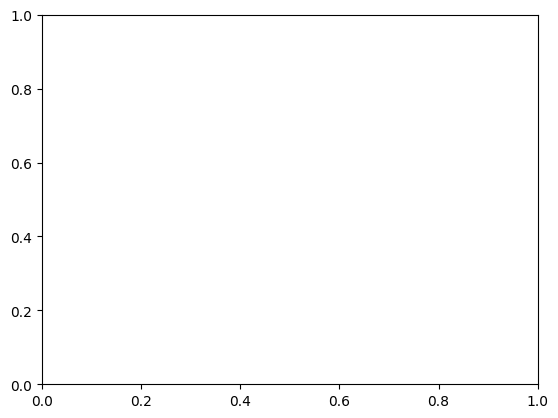

In [24]:
import matplotlib.pyplot as plt

# Assuming loss_values is a list containing the loss values for each epoch
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# predict with what we have so far


In [28]:
# Define the path to the directory containing the model checkpoints
CHECKPOINT_DIR = './llm-detect-ai-generated-text/checkpoints/'

# Initialize variables to track the latest checkpoint
latest_epoch = 0
latest_iteration = 0
latest_checkpoint = None


# Iterate through the files in the checkpoint directory
for filename in os.listdir(CHECKPOINT_DIR):
    if filename.endswith(".pth"):
        parts = filename.split('_')
        epoch = int(parts[4])  # Extract the epoch number from the filename
        iteration = int(parts[6].split('.')[0])  # Extract the iteration number from the filename
        if epoch > latest_epoch or (epoch == latest_epoch and iteration > latest_iteration):
            latest_epoch = epoch
            latest_iteration = iteration
            latest_checkpoint = os.path.join(CHECKPOINT_DIR, filename)


In [29]:
latest_checkpoint

'./llm-detect-ai-generated-text/checkpoints/llm_fraud_classification_epoch_1_iteration_38.pth'

In [30]:
import torch

# Define a function for prediction
def predict(model, tokenizer, text):
    # Tokenize the text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # Perform the forward pass
    with torch.no_grad():
        outputs = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])

    # Get the predicted probabilities and labels
    probabilities = torch.softmax(outputs.logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1).tolist()

    return predicted_labels, probabilities



CHECKPOINT_DIR = './llm-detect-ai-generated-text/checkpoints/'

# Initialize variables to track the latest checkpoint
latest_epoch = 0
latest_iteration = 0
latest_checkpoint = None

# Iterate through the files in the checkpoint directory
for filename in os.listdir(CHECKPOINT_DIR):
    if filename.endswith(".pth"):
        parts = filename.split('_')
        epoch = int(parts[4])  # Extract the epoch number from the filename
        iteration = int(parts[6].split('.')[0])  # Extract the iteration number from the filename
        if epoch > latest_epoch or (epoch == latest_epoch and iteration > latest_iteration):
            latest_epoch = epoch
            latest_iteration = iteration
            latest_checkpoint = os.path.join(CHECKPOINT_DIR, filename)

# Load the latest checkpoint if available
if latest_checkpoint is not None:
    print(f"Loading the latest checkpoint: {latest_checkpoint}")
    try:
        checkpoint = torch.load(latest_checkpoint)
        model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
        model_with_activation.load_state_dict(checkpoint['model_state_dict'])
    except RuntimeError as e:
        print(f"Failed to load checkpoint: {e}. Trying to load the prior iteration checkpoint.")
        prior_iteration_checkpoint = os.path.join(CHECKPOINT_DIR, f'llm_fraud_classification_epoch_{latest_epoch}_iteration_{latest_iteration - 1}.pth')
        if os.path.exists(prior_iteration_checkpoint):
            checkpoint = torch.load(prior_iteration_checkpoint)
            model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)
            model_with_activation.load_state_dict(checkpoint['model_state_dict'])
        else:
            print("No valid prior iteration checkpoint found.")
else:
    print("No checkpoint found.")

# Initialize the model with the loaded checkpoint or with pre-trained weights if no checkpoint is available
if latest_checkpoint is None:
    print("Initializing the model with pre-trained weights.")
    model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)


Loading the latest checkpoint: ./llm-detect-ai-generated-text/checkpoints/llm_fraud_classification_epoch_1_iteration_38.pth
Failed to load checkpoint: PytorchStreamReader failed locating file data/2: file not found. Trying to load the prior iteration checkpoint.


In [31]:
model_with_activation

DebertaV3CustomClassifier(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
  

In [32]:
latest_iteration

38

In [ ]:
# Set the model to evaluation mode
model_with_activation.eval()

# Input text for prediction
input_text = df.text[100]

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
attention_mask = input_ids.ne(0)  # Create attention mask

# Perform inference
with torch.no_grad():
    outputs = model_with_activation(input_ids=input_ids, attention_mask=attention_mask)

# Get the predicted probabilities
probabilities = torch.softmax(outputs, dim=1).squeeze()

# Convert probabilities to predicted labels
predicted_label = torch.argmax(probabilities).item()

# Print the results
print("Predicted probabilities:", probabilities)
print("Predicted label:", predicted_label)

Predicted probabilities: tensor([0.4911, 0.5089])
Predicted label: 1


# performance

In [37]:
# Separate samples based on labels
class_0_samples = ext_df[ext_df['label'] == 0]
class_1_samples = ext_df[ext_df['label'] == 1]

# Determine the minimum number of samples in a class
min_samples = 1000

# Sample an equal number of samples from each class
balanced_samples = pd.concat([
    class_0_samples.sample(n=min_samples, replace=False, random_state=42),
    class_1_samples.sample(n=min_samples, replace=False, random_state=42)
])

# Shuffle the balanced dataset
balanced_samples = balanced_samples.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract text and labels from balanced dataset
balanced_texts = balanced_samples['text'].tolist()
balanced_labels = balanced_samples['label'].tolist()

In [38]:
balanced_samples.label.value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [39]:
import torch
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from transformers import DebertaV2Tokenizer

# Define a function to tokenize the texts and get input_ids and attention_mask
def tokenize_texts(texts, tokenizer, max_length):
    tokenized_texts = tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenized_texts["input_ids"], tokenized_texts["attention_mask"]

# Assuming you have a DataFrame called df with columns "text" and "label"
texts =balanced_samples['text']
labels = balanced_samples['label']

# Tokenize the texts
input_ids, attention_mask = tokenize_texts(texts, tokenizer, max_length)

# Create DataLoader for the dataset
dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, torch.tensor(labels))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Lists to store predictions and true labels
all_predictions = []
all_true_labels = []

# Perform inference on the dataset
with torch.no_grad():
    for batch in data_loader:
        input_ids, attention_mask, targets = batch
        logits = model_with_activation(input_ids, attention_mask)
        predictions = torch.argmax(logits, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_true_labels.extend(targets.cpu().numpy())



In [40]:
# Convert predictions and true labels to numpy arrays
predictions_np = np.array(all_predictions)
true_labels_np = np.array(all_true_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_np, predictions_np)
auc = roc_auc_score(true_labels_np, predictions_np)
f1 = f1_score(true_labels_np, predictions_np)

# Print the metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score:", f1)


Accuracy: 0.985
AUC: 0.985
F1 Score: 0.984848484848485


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import StratifiedKFold
from transformers import DebertaV2Model, DebertaV2Tokenizer
from transformers import AdamW
import math

# Define the text data and corresponding labels
texts = text_data
labels = label_data  # Example labels: 1 for positive sentiment, 0 for negative sentiment

# Load the DeBERTa model and tokenizer
MODEL_NAME = 'microsoft/deberta-v3-base'
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

# Unfreeze model parameters for fine-tuning
for param in deberta_model.parameters():
    param.requires_grad = True

# Define custom classifier head with activation function for text classification
class TextClassifierHead(nn.Module):
    def __init__(self, input_size, num_labels, activation):
        super(TextClassifierHead, self).__init__()
        self.dropout = nn.Dropout(0.1)  # Example dropout rate
        self.fc = nn.Linear(input_size, num_labels)
        self.activation = activation

    def forward(self, x):
        x = self.dropout(x)
        x = self.fc(x)
        if self.activation is not None:
            x = self.activation(x)
        return x

# Define DeBERTaV3CustomClassifier with the new classifier head
class DebertaV3CustomClassifier(nn.Module):
    def __init__(self, deberta_model, num_labels, activation):
        super(DebertaV3CustomClassifier, self).__init__()
        self.deberta = deberta_model
        self.classifier = TextClassifierHead(deberta_model.config.hidden_size, num_labels, activation)

    def forward(self, input_ids, attention_mask):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Take the CLS token
        logits = self.classifier(pooled_output)
        return logits

# Define activation function
activation_function = nn.ReLU()  # Example: ReLU activation

# Create the model with the custom classifier head and activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation_function)

# Define cross-validation parameters
num_epochs = 2
batch_size = 1 # Example batch size
num_workers = 1  # Limit resource consumption by setting the number of worker threads

# Define your predefined learning rate function
def get_lr(epoch):
    lr_start, lr_max, lr_min = 0.6e-6, 0.5e-6 * batch_size, 0.3e-6
    lr_ramp_ep, lr_sus_ep, lr_decay = 1, 0, 0.75

    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max
    else:
        decay_total_epochs, decay_epoch_index = num_epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
        phase = math.pi * decay_epoch_index / decay_total_epochs
        lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min

    return lr

# Convert labels to numpy array
y = np.array(labels)

# Perform cross-validation
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Tokenize and encode the texts with a maximum length
    max_length = 200  # Example maximum length
    X_encoded = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

    # Define data loader with limited resource consumption
    dataset = torch.utils.data.TensorDataset(X_encoded["input_ids"], X_encoded["attention_mask"], torch.tensor(y))
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    # Define optimizer
    optimizer = AdamW(model_with_activation.parameters(), lr=1e-5)  # Example learning rate

    # Fine-tuning loop
    accumulation_steps = 4  # Accumulate gradients over 4 steps
    for i, batch in enumerate(data_loader):
        model_with_activation.train()
        input_ids, attention_mask, targets = batch
        optimizer.zero_grad()

        logits_train = model_with_activation(input_ids, attention_mask)
        loss = nn.CrossEntropyLoss()(logits_train, targets)
        loss.backward()

        if (i + 1) % accumulation_steps == 0:  # Update weights after accumulation_steps
            optimizer.step()
            optimizer.zero_grad()

        # Save the model after each batch
        torch.save(model_with_activation.state_dict(), f'saved_model_epoch_{epoch + 1}_batch_{i + 1}.pth')

        print(f"Iteration {i + 1}/{len(data_loader)}, Loss: {loss.item()}")

    # Release unused resources
    del X_encoded, logits_train, loss
    torch.cuda.empty_cache()  # Empty the CUDA cache to release GPU memory


In [ ]:
np.array(texts)[train_index], np.array(texts)[val_index]

(array(['This movie was great!', 'This movie was great!',
        'This movie was great!'], dtype='<U36'),
 array(['This movie was great!', 'The plot of the book was intriguing.',
        'I did not enjoy the music concert.', 'This movie was great!'],
       dtype='<U36'))

In [ ]:
# Example input text
input_text = "This movie was really great!"

# Tokenize input text
input_ids = tokenizer(input_text, return_tensors='pt')['input_ids']



In [ ]:
input_ids

tensor([[   1,  329, 1421,  284,  431,  426,  300,    2]])

In [ ]:
input_ids.shape

torch.Size([1, 8])

In [ ]:
input_ids != tokenizer.pad_token_id

tensor([[True, True, True, True, True, True, True, True]])

In [ ]:
# Forward pass
logits = model_with_activation(input_ids=input_ids, attention_mask=(input_ids != tokenizer.pad_token_id))

# Convert logits to probabilities
probabilities = torch.softmax(logits, dim=-1)

print("Logits:", logits)
print("Probabilities:", probabilities)

Logits: tensor([[0., 0.]], grad_fn=<ReluBackward0>)
Probabilities: tensor([[0.5000, 0.5000]], grad_fn=<SoftmaxBackward0>)


In [ ]:
import torch
import torch.nn as nn
from transformers import DebertaV2Model, DebertaV2Tokenizer

MODEL_NAME = 'microsoft/deberta-v3-base'
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

# Freeze model parameters
for param in deberta_model.parameters():
    param.requires_grad = False

# Define custom classifier head
class CustomClassifierHead(nn.Module):
    def __init__(self, input_size, output_size, activation=None):
        super(CustomClassifierHead, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.activation = activation

    def forward(self, x):
        x = self.fc(x)
        if self.activation is not None:
            x = self.activation(x)
        return x

# Define DeBERTaV3CustomClassifier
class DebertaV3CustomClassifier(nn.Module):
    def __init__(self, deberta_model, num_labels, activation=None):
        super(DebertaV3CustomClassifier, self).__init__()
        self.deberta = deberta_model
        self.classifier = CustomClassifierHead(deberta_model.config.hidden_size, num_labels, activation)

    def forward(self, input_ids, attention_mask):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Take the CLS token
        logits = self.classifier(pooled_output)
        return logits

# Define activation function
activation_function = nn.ReLU()  # Example: ReLU activation

# Create the model with the specified activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation=activation_function)

# Example input text
input_text = "This movie was really great!"

# Tokenize input text
input_ids = tokenizer(input_text, return_tensors='pt')['input_ids']

# Forward pass
logits = model_with_activation(input_ids=input_ids, attention_mask=(input_ids != tokenizer.pad_token_id))

# Convert logits to probabilities
probabilities = torch.softmax(logits, dim=-1)

print("Logits:", logits)
print("Probabilities:", probabilities)


Logits: tensor([[0.0000, 0.4695]], grad_fn=<ReluBackward0>)
Probabilities: tensor([[0.3847, 0.6153]], grad_fn=<SoftmaxBackward0>)


In [ ]:

# Create the model with the specified activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation=activation_function)

# Example input text
input_text = "This movie was really great!"

# Tokenize input text
tokenizer(input_text, return_tensors='pt')

{'input_ids': tensor([[   1,  329, 1421,  284,  431,  426,  300,    2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
im here

In [ ]:
import torch
import torch.nn as nn
import keras_nlp
from transformers import DebertaV2Model, DebertaV2Tokenizer

MODEL_NAME = 'microsoft/deberta-v3-base'
deberta_model = DebertaV2Model.from_pretrained(MODEL_NAME)
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

# Freeze model parameters
for param in deberta_model.parameters():
    param.requires_grad = False

# Define custom classifier head
class CustomClassifierHead(nn.Module):
    def __init__(self, input_size, output_size, activation=None):
        super(CustomClassifierHead, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.activation = activation

    def forward(self, x):
        x = self.fc(x)
        if self.activation is not None:
            x = self.activation(x)
        return x

# Define DeBERTaV3CustomClassifier
class DebertaV3CustomClassifier(nn.Module):
    def __init__(self, deberta_model, num_labels, activation=None):
        super(DebertaV3CustomClassifier, self).__init__()
        self.deberta = deberta_model
        self.classifier = CustomClassifierHead(deberta_model.config.hidden_size, num_labels, activation)

    def forward(self, input_ids, attention_mask):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Take the CLS token
        logits = self.classifier(pooled_output)
        return logits

# Define activation function
activation_function = nn.ReLU()  # Example: ReLU activation

# Create the model with the specified activation function
num_labels = 2  # Example: number of output labels
model_with_activation = DebertaV3CustomClassifier(deberta_model, num_labels, activation=activation_function)




In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
num_epochs=5
# Define your dataset and dataloaders
# Example:
train_dataset = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_with_activation.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model_with_activation.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        logits = model_with_activation(inputs, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model_with_activation.eval()
    with torch.no_grad():
        for val_inputs, val_labels in val_dataloader:
            val_logits = model_with_activation(val_inputs, val_attention_mask)
            val_loss = criterion(val_logits, val_labels)
            # Compute validation metrics if needed

    # Print epoch information
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Evaluate on test set
model_with_activation.eval()
with torch.no_grad():
    for test_inputs, test_labels in test_dataloader:
        test_logits = model_with_activation(test_inputs, test_attention_mask)
        # Compute test metrics if needed


In [ ]:
# Example input text
input_text = "This movie was really great!"


In [ ]:

# Preprocess input text using DeBERTa V3 preprocessor
preset = "deberta_v3_base_en"  # Name of pretrained models
sequence_length = 200 # Input sequence length
preprocessor = keras_nlp.models.DebertaV3Preprocessor.from_preset(
    preset=preset,  # Name of the model
    sequence_length=sequence_length,  # Max sequence length, will be padded if shorter
)



In [ ]:
preprocessed_inputs = preprocessor(input_text)

# Extract token_ids and padding_mask
input_ids = preprocessed_inputs['token_ids']
attention_mask = preprocessed_inputs['padding_mask']


In [ ]:
# Assuming input_ids is a tf.Tensor
input_ids = torch.tensor(input_ids.numpy()).reshape((1, sequence_length))  # Convert tf.Tensor to torch.Tensor directly

input_ids

tensor([[   1,  329, 1421,  284,  431,  426,  300,    2]], dtype=torch.int32)

In [ ]:
attention_mask=torch.tensor(attention_mask.numpy()).reshape((1, sequence_length))

In [ ]:
attention_mask

tensor([[True, True, True, True, True, True, True, True]])

In [ ]:

# Forward pass
logits = model_with_activation(input_ids, attention_mask)



In [ ]:
# Convert logits to probabilities
probabilities = torch.softmax(logits, dim=-1)


In [ ]:
# Convert PyTorch tensors to NumPy arrays for printing
logits_numpy = logits.detach().numpy()
probabilities_numpy = probabilities.detach().numpy()

print("Logits:", logits_numpy)
print("Probabilities:", probabilities_numpy)


Logits: [[0. 0.]]
Probabilities: [[0.5 0.5]]


In [ ]:
# Assuming probabilities is a PyTorch tensor with gradients enabled
probabilities = torch.tensor([0.5, 0.5], requires_grad=True)

# Convert the PyTorch tensor to a NumPy array
probabilities_numpy = probabilities.detach().numpy()

print("Probabilities (NumPy):", probabilities_numpy)

Probabilities (NumPy): [0.5 0.5]


In [ ]:
from keras_nlp.models import  DebertaV3Preprocessor


preset = "deberta_v3_base_en"  # Name of pretrained models
sequence_length = 200  # Input sequence length


preprocessor = keras_nlp.models.DebertaV3Preprocessor.from_preset(
    preset=preset, # Name of the model
   sequence_length=sequence_length, # Max sequence length, will be padded if shorter
)
# Preprocess input text
preprocessed_inputs = preprocessor(input_text)

# Extract token_ids and padding_mask
input_ids = preprocessed_inputs['token_ids']
padding_mask = preprocessed_inputs['padding_mask']

print(input_ids)
print(padding_mask)

# Example input text
input_text = ["This movie was really great!", "I loved the plot."]

import tensorflow as tf
# Convert input text to TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices(input_text)

# Preprocess input data using the preprocessing layer
preprocessed_dataset = dataset.map(lambda x: preprocessor(x))

# Iterate through preprocessed dataset
for batch in preprocessed_dataset:
    input_ids = batch['token_ids']
    attention_mask = batch['padding_mask']
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)


tf.Tensor(
[[   1  329 1421  284  431  426  300    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  

In [ ]:
from keras_nlp.models import DebertaV3Tokenizer

import tensorflow as tf

# Initialize DeBERTa tokenizer
tokenizer = DebertaV3Tokenizer.from_pretrained('microsoft/deberta-v3-xlarge')

# Initialize DeBERTa preprocessing layer
preprocessor = DebertaPreprocessor(tokenizer=tokenizer, sequence_length=512, truncate="round_robin")

# Example input text
input_text = ["This movie was really great!", "I loved the plot."]

# Convert input text to TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices(input_text)

# Preprocess input data using the preprocessing layer
preprocessed_dataset = dataset.map(lambda x: preprocessor(x))

# Iterate through preprocessed dataset
for batch in preprocessed_dataset:
    input_ids = batch['token_ids']
    attention_mask = batch['padding_mask']
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)


ImportError: cannot import name 'DebertaPreprocessor' from 'keras_nlp.layers' (/usr/local/lib/python3.10/dist-packages/keras_nlp/layers/__init__.py)

In [ ]:
inp = preprocessor(df.text.iloc[1])  # Process text for the first row

# Display the shape of each processed output
for k, v in inp.items():
    print(k, ":", v.shape)

token_ids : (200,)
padding_mask : (200,)


In [ ]:
df.text.iloc[1]


'Landform or alien? The face on Mars looks pretty cool right. This face of Mars made it to hollywood and radio talks and books. People were egar to see this face, once they saw it then there was alien talk. We all know its cool to think there might be life out there, but it\'s just a natural landform.\n\nEven though this face is so detailed with the mouth and the eyes and nose, it\'s just a natural landform. NASA even said it for themselves. " Thousands of anxious web surfers were waiting when the image first appeared on a JPL web site, revealing... a natural landform. There was NO alien monument after all." So, If a professional NASA team says it\'s a landform, i\'m not going to argue on the debate.\n\nHowever if your still not conviced I have more to prove. I haven\'t heard any information about aliens being true or alive. So, why would we still believe and hold on to the fact that there may not be life out there. NASA hasn\'t said anything about aliens but they have said that things

In [ ]:
inp.items()

dict_items([('token_ids', <tf.Tensor: shape=(200,), dtype=int32, numpy=
array([    1,  4107,  9930,   289,  9302,   302,   279,   812,   277,
        7583,  1127,   890,  1570,   423,   260,   329,   812,   265,
        7583,   412,   278,   264, 54063,   263,  2442,  3496,   263,
        1116,   260,  1792,   332,   865, 10522,   264,   398,   291,
         812,   261,   704,   306,  1053,   278,   393,   343,   284,
        9302,  1072,   260,   345,   305,   391,   359,  1570,   264,
         428,   343,   520,   282,   432,   321,   343,   261,   304,
         278,   280,   268,   348,   266,  1008,  1311,  9930,   260,
        1289,   651,   291,   812,   269,   324,  2478,   275,   262,
        2933,   263,   262,  1365,   263,  4752,   261,   278,   280,
         268,   348,   266,  1008,  1311,  9930,   260,  7658,   402,
         357,   278,   270,  1147,   260,   307, 14965,   265,  9567,
         967, 32455,   332,  1925,   335,   262,  1115,   362,  2325,
         277,   26

In [ ]:
df

,essay_id,text,label,source,prompt,fold,name,stratify
0,83BB96F966DB,Students would benefit from being able to atte...,0,persuade_corpus,NaN,3,real,0persuade_corpus
1,80D6E256AA49,Landform or alien? The face on Mars looks pret...,0,persuade_corpus,NaN,2,real,0persuade_corpus
2,4A028F63CFCA,The human body is a complex network of muscles...,0,persuade_corpus,NaN,0,real,0persuade_corpus
3,5782F64504B9,Summer projects are a means by which schools a...,0,persuade_corpus,NaN,2,real,0persuade_corpus
4,97DD2D770B03,"Dear Mr. Senator,\n\nI have decided to express...",0,persuade_corpus,NaN,2,real,0persuade_corpus
...,...,...,...,...,...,...,...,...
28205,falcon_180b_v1_261,I think it's a good idea for schools to have o...,1,falcon_180b_v1,Some schools have implemented policies that al...,4,fake,1falcon_180b_v1
28206,BDF13939FA26,Students often debate whether inactivity or s...,1,mistral7binstruct_v2,\nTask: Research the benefits of staying occup...,3,fake,1mistral7binstruct_v2
28207,1ed36fd42635_04112023,The Seagoing Cowboys program is an amazing opp...,1,darragh_claude_v6,NaN,2,fake,1darragh_claude_v6
28208,d8f15f7d,Advantages of Limiting Car Usage\n\nLimiting c...,1,radek_500,NaN,2,fake,1radek_500


In [ ]:
def preprocess_fn(text, label=None):
    text = preprocessor(text)  # Preprocess text
    return (text, label) if label is not None else text  # Return processed text and label if available

In [ ]:
def build_dataset(texts, labels=None, batch_size=32,
                  cache=False, drop_remainder=True,
                  repeat=False, shuffle=1024):
    AUTO = tf.data.AUTOTUNE  # AUTOTUNE option
    slices = (texts,) if labels is None else (texts, labels)  # Create slices
    ds = tf.data.Dataset.from_tensor_slices(slices)  # Create dataset from slices
    ds = ds.cache() if cache else ds  # Cache dataset if enabled
    ds = ds.map(preprocess_fn, num_parallel_calls=AUTO)  # Map preprocessing function
    ds = ds.repeat() if repeat else ds  # Repeat dataset if enabled
    opt = tf.data.Options()  # Create dataset options
    if shuffle:
        ds = ds.shuffle(shuffle, seed=CFG.seed)  # Shuffle dataset if enabled
        opt.experimental_deterministic = False
    ds = ds.with_options(opt)  # Set dataset options
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)  # Batch dataset
    ds = ds.prefetch(AUTO)  # Prefetch next batch
    return ds  # Return the built dataset

In [ ]:
def get_datasets(fold):
    train_df = df[df.fold!=fold].sample(frac=1)  # Get training fold data

    train_texts = train_df.text.tolist()  # Extract training texts
    train_labels = train_df.label.tolist()  # Extract training labels

    # Build training dataset
    train_ds = build_dataset(train_texts, train_labels,
                             batch_size=CFG.batch_size*CFG.replicas, cache=CFG.cache,
                             shuffle=True, drop_remainder=True, repeat=True)

    valid_df = df[df.fold==fold].sample(frac=1)  # Get validation fold data
    valid_texts = valid_df.text.tolist()  # Extract validation texts
    valid_labels = valid_df.label.tolist()  # Extract validation labels

    # Build validation dataset
    valid_ds = build_dataset(valid_texts, valid_labels,
                             batch_size=min(CFG.batch_size*CFG.replicas, len(valid_df)), cache=CFG.cache,
                             shuffle=False, drop_remainder=True, repeat=False)

    return (train_ds, train_df), (valid_ds, valid_df)  # Return datasets and dataframes

In [ ]:
import wandb  # Import wandb library for experiment tracking

try:
    from kaggle_secrets import UserSecretsClient  # Import UserSecretsClient
    user_secrets = UserSecretsClient()  # Create secrets client instance
    api_key = user_secrets.get_secret("WANDB")  # Get API key from Kaggle secrets
    wandb.login(key=api_key)  # Login to wandb with the API key
    anonymous = None  # Set anonymous mode to None
except:
    anonymous = 'must'  # Set anonymous mode to 'must'
    wandb.login(anonymous=anonymous, relogin=True)  # Login to wandb anonymously and relogin if needed

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Initializes the W&B run with a config file and W&B run settings.
def wandb_init(fold):
    config = {k: v for k, v in dict(vars(CFG)).items() if '__' not in k}  # Create config dictionary
    config.update({"fold": int(fold)})  # Add fold to config
    run = wandb.init(project="llm-fake-text",
                     name=f"fold-{fold}|max_seq-{CFG.sequence_length}|model-{CFG.preset}",
                     config=config,
                     group=CFG.comment,
                     save_code=True)
    return run

# Log best result for error analysis
def log_wandb():
    wandb.log({'best_auc': best_auc, 'best_loss': best_loss, 'best_epoch': best_epoch})

# Fetch W&B callbacks
def get_wb_callbacks(fold):
    wb_metr = wandb.keras.WandbMetricsLogger()
    return [wb_metr]  # Return WandB callbacks

In [ ]:
import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 0.6e-6, 0.5e-6 * batch_size, 0.3e-6
    lr_ramp_ep, lr_sus_ep, lr_decay = 1, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

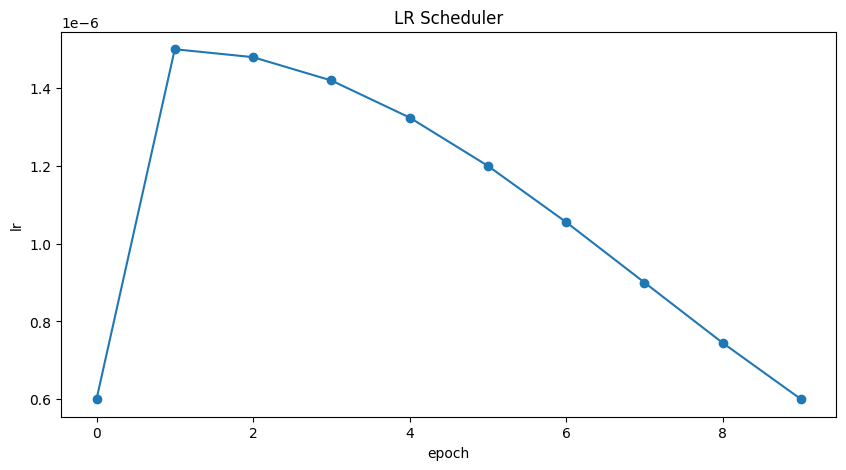

In [ ]:
_=get_lr_callback(CFG.batch_size*CFG.replicas, plot=True)


In [ ]:

def get_callbacks(fold):
    callbacks = []
    lr_cb = get_lr_callback(CFG.batch_size*CFG.replicas)  # Get lr callback
    ckpt_cb = keras.callbacks.ModelCheckpoint(f'fold{fold}.keras',
                                              monitor='val_auc',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              mode='max')  # Get Model checkpoint callback
    callbacks.extend([lr_cb, ckpt_cb])  # Add lr and checkpoint callbacks

    if CFG.wandb:  # If WandB is enabled
        wb_cbs = get_wb_callbacks(fold)  # Get WandB callbacks
        callbacks.extend(wb_cbs)

    return callbacks  # Return the list of callbacks

In [ ]:
class SelectOption(keras.layers.Layer):
    def __init__(self, index, **kwargs):
        super().__init__(**kwargs)
        self.index = index

    def call(self, inputs):
        # Selects a specific slice from the inputs tensor
        return inputs[:, self.index, :]

    def get_config(self):
        # For serialize the model
        base_config = super().get_config()
        config = {
            "index": self.index,
        }
        return {**base_config, **config}


In [ ]:
classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset,
        preprocessor=None,
        num_classes=1 # one output per one option, for five options total 5 outputs
    )

735557816/735557816 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [ ]:
!pip install keras_nlp

In [ ]:


from keras.layers import Activation
import keras_nlp


def build_model():
    # Create a DebertaV3Classifier model
    classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset,
        preprocessor=None,
        num_classes=1  # Assuming binary classification
    )

    # Get the model's input layer
    inputs = classifier.input

    # Get the logits output of the DebertaV3Classifier model
    logits = classifier(inputs)

    # Apply sigmoid activation function to the logits
    outputs = Activation("sigmoid")(logits)

    # Instantiate the model with input and output layers
    model = keras.Model(inputs, outputs)

    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=5e-6),
        loss=keras.losses.BinaryCrossentropy(label_smoothing=0.02),
        metrics=[
            keras.metrics.AUC(name="auc"),
        ],
        jit_compile=True  # You can enable JIT compilation if your environment supports it
    )

    return model

In [ ]:
# with strategy.scope
model = build_model()

NameError: name 'CFG' is not defined

In [ ]:

def build_model():
    # Create a DebertaV3Classifier model
    classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset,
        preprocessor=None,
        num_classes=1 # one output per one option, for five options total 5 outputs
    )
    inputs = classifier.input
    logits = classifier(inputs)

    # Compute final output
    outputs = keras.layers.Activation("sigmoid")(logits)
    model = keras.Model(inputs, outputs)

    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer=keras.optimizers.AdamW(5e-6),
        loss=keras.losses.BinaryCrossentropy(label_smoothing=0.02),
        metrics=[
            keras.metrics.AUC(name="auc"),
        ],
        jit_compile=True
    )
    return model

In [ ]:
# with strategy.scope
model = build_model()

ValueError: A KerasTensor cannot be used as input to a JAX function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
jax_fn(x)  # Invalid.
```

What you should do instead is wrap `jax_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return jax_fn(x)

x = MyLayer()(x)
```


In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset,
        preprocessor=None,
        num_classes=1 # one output per one option, for five options total 5 outputs
    )

In [ ]:
option = {k: SelectOption(option_idx, name=f"{k}_{option_idx}")(v) for k, v in inputs.items()}
        logit = classifier(option)

In [ ]:
print((classifier.input.values()))

dict_values([<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids>, <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=padding_mask>])


In [ ]:
inputs = classifier.input
logits = classifier(inputs)

In [ ]:
inputs

NameError: name 'inputs' is not defined

In [ ]:
from keras.layers import Input

inputs = Input(classifier.input)

ValueError: Cannot convert '('token_ids', 'padding_mask')' to a shape. Found invalid entry 'token_ids' of type '<class 'str'>'. 

In [ ]:
print(type(inputs))

<class 'str'>


In [ ]:

logits = classifier(inputs)


from keras.layers import Activation

outputs = Activation("sigmoid")(logits)
#outputs = keras.layers.Activation("sigmoid")(logits)
model = keras.Model(inputs, outputs)



ValueError: When providing `inputs` as a dict, all values in the dict must be KerasTensors. Received: inputs={'token_ids': <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids>, 'padding_mask': <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=padding_mask>} including invalid value <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids> of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'>

In [ ]:
input

<bound method Kernel.raw_input of <google.colab._kernel.Kernel object at 0x7e0e1844b760>>

In [ ]:
outputs

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_67>

In [ ]:
from keras.layers import Activation

inputs = classifier.input
logits = classifier(inputs)

    # Compute final output
outputs = Activation("sigmoid")(logits)

model = keras.Model(
        inputs=
            list(inputs.values()),

        outputs=outputs
    )

# Compile
classifier.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-5),
    metrics= ["accuracy"]
)




ValueError: When providing `inputs` as a list/tuple, all values in the list/tuple must be KerasTensors. Received: inputs=[<KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids>, <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=padding_mask>] including invalid value <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=token_ids> of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'>

In [ ]:
for fold in CFG.selected_folds:
    # Initialize Weights and Biases if enabled
    if CFG.wandb:
        run = wandb_init(fold)

    # Get train and validation datasets
    (train_ds, train_df), (valid_ds, valid_df) = get_datasets(fold)

    # Get callback functions for training
    callbacks = get_callbacks(fold)

    # Print training information
    print('#' * 50)
    print(f'\tFold: {fold + 1} | Model: {CFG.preset}\n\tBatch Size: {CFG.batch_size * CFG.replicas} | Scheduler: {CFG.scheduler}')
    print(f'\tNum Train: {len(train_df)} | Num Valid: {len(valid_df)}')
    print('#' * 50)

    # Clear TensorFlow session and build the model within the strategy scope
    K.clear_session()
    with strategy.scope():
        model = build_model()

    # Start training the model
    history = model.fit(
        train_ds,
        epochs=CFG.epochs,
        validation_data=valid_ds,
        callbacks=callbacks,
        steps_per_epoch=int(len(train_df) / CFG.batch_size / CFG.replicas),
    )


    # Find the epoch with the best validation accuracy
    best_epoch = np.argmax(model.history.history['val_auc'])
    best_auc = model.history.history['val_auc'][best_epoch]
    best_loss = model.history.history['val_loss'][best_epoch]

    # Print and display best results
    print(f'\n{"=" * 17} FOLD {fold} RESULTS {"=" * 17}')
    print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST AUC   : {best_auc:.3f}\n>>>> BEST Epoch : {best_epoch}')
    print('=' * 50)

    # Log best result on Weights and Biases (wandb) if enabled
    if CFG.wandb:
        log_wandb()  # Log results
        wandb.run.finish()  # Finish the run
#         display(ipd.IFrame(run.url, width=1080, height=720)) # show wandb dashboard
    print("\n\n")

In [ ]:
# Make predictions using the trained model on last validation data
predictions = model.predict(
    valid_ds,
    batch_size=min(CFG.batch_size * CFG.replicas * 2, len(valid_df)), # max batch size = valid size
    verbose=1
)

In [ ]:
# Log in to your W&B account
import wandb

In [ ]:
wandb login -relogin

In [ ]:
wandb.login()